In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import yaml

from tqdm.notebook import tqdm


Trying to do MCS studies for Nevis Columbia 2025 SPINE workshop: 

https://indico.nevis.columbia.edu/event/11/timetable/?view=standard

https://docs.google.com/presentation/d/13vJjoj7HTmgEESZjgeeIXX3w-0HaMtFKKA1qNc4PMuI/edit?slide=id.g2ecf727ff29_0_0#slide=id.g2ecf727ff29_0_0

![](screenshot.png)

In [2]:
from spine.driver import Driver


Welcome to JupyROOT 6.26/16


In [3]:
cfg_txt = '''
base:
  verbosity: warning
io:
  reader:
    name: hdf5
    file_keys: DATA_PATH
    skip_unknown_attrs: true
    
# Build reconstruction output representations
build:
  mode: both
  units: cm
  fragments: false
  particles: true
  interactions: true
'''


In [4]:
# downloaded from /pnfs/sbnd/persistent/users/mueller/MCP2025B/full_hdf5_test_files/mc5e18/*.h5
DATA_FILES = os.listdir('/nevis/riverside/data/leehagaman/spine/mc5e18')

log_file_location = '/nevis/houston/home/leehagaman/spine/mcs_studies/logs'

for file in os.listdir(log_file_location):
    os.remove(f'{log_file_location}/{file}')

num_files = 1

true_contained = []
reco_contained = []
true_primary = []
reco_primary = []
true_start_point = []
reco_start_point = []
true_start_dir = []
reco_start_dir = []
truth_ke = []
reco_ke = []
reco_mcs_ke = []
reco_csda_ke = []
reco_calo_ke = []

for file_i, DATA_FILE in tqdm(enumerate(DATA_FILES[:num_files]), total=num_files):

    #DATA_PATH = f'/nevis/riverside/data/leehagaman/spine/mc5e18/{DATA_FILE}'
    DATA_PATH = f'/nevis/riverside/data/leehagaman/spine/sbnd_medium_spine.h5'

    cfg = yaml.safe_load(cfg_txt.replace('DATA_PATH', DATA_PATH))
    driver = Driver(cfg)

    for ENTRY in range(len(driver)):
        data = driver.process(entry=ENTRY)
        for truth_interaction in data['truth_interactions']:
            if truth_interaction.nu_id == -1: # cosmic rather than neutrino
                continue

            for true_particle in truth_interaction.particles:

                if abs(true_particle.pdg_code) != 13: # non-muon
                    continue

                if not true_particle.is_matched: # no reco match
                    continue

                reco_match_id = true_particle.match_ids[0]

                for reco_particle in data['reco_particles']:
                    if reco_particle.id == reco_match_id:
                        break

                true_contained.append(true_particle.is_contained)
                reco_contained.append(reco_particle.is_contained)

                true_primary.append(true_particle.is_primary)
                reco_primary.append(reco_particle.is_primary)

                true_start_point.append(true_particle.start_point)
                reco_start_point.append(reco_particle.start_point)

                true_start_dir.append(true_particle.start_dir)
                reco_start_dir.append(reco_particle.start_dir)

                truth_ke.append(true_particle.ke)
                reco_ke.append(reco_particle.ke)
                reco_mcs_ke.append(reco_particle.mcs_ke)
                reco_csda_ke.append(reco_particle.csda_ke)
                reco_calo_ke.append(reco_particle.calo_ke)
                


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame({
    'true_contained': true_contained,
    'reco_contained': reco_contained,
    'true_primary': true_primary,
    'reco_primary': reco_primary,
    'true_start_point': true_start_point,
    'reco_start_point': reco_start_point,
    'true_start_dir': true_start_dir,
    'reco_start_dir': reco_start_dir,
    'truth_ke': truth_ke,
    'reco_ke': reco_ke,
    'reco_mcs_ke': reco_mcs_ke,
    'reco_csda_ke': reco_csda_ke,
    'reco_calo_ke': reco_calo_ke})
df

,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,reco_ke,reco_mcs_ke,reco_csda_ke,reco_calo_ke
0,False,False,1,1,"[161.85, -147.15, 65.15]","[14.25, -92.55, 155.15]","[-0.81016964, 0.30099657, 0.5030172]","[-0.81764877, 0.30465323, 0.48850483]",2350.226280,713.945497,713.945497,583.509887,104791.0
1,True,True,1,1,"[-20.25, 47.850006, 180.05002]","[-20.25, 45.75, 178.25]","[0.076584935, -0.8098577, -0.5816057]","[0.08187558, -0.81374854, -0.5754212]",2895.981665,680.121276,1704.396521,680.121276,321944.0
2,False,False,1,1,"[-61.65001, -57.15001, 301.85]","[-64.65001, -56.25, 298.55002]","[-0.6959469, 0.2412914, -0.67634046]","[-0.7012231, 0.2528899, -0.666583]",1775.429848,1565.785600,1565.785600,449.031523,215395.0
3,False,False,1,1,"[69.75, -71.25, 203.45001]","[69.75, -71.25, 203.45001]","[-0.14705238, -0.97736114, 0.15212119]","[-0.14380853, -0.976979, 0.15757905]",2982.038545,1510.401529,1510.401529,317.387682,150224.0
4,False,False,1,1,"[160.35, 67.649994, 459.05002]","[160.65, 67.95001, 459.35]","[-0.68293816, -0.44690433, 0.5778166]","[-0.6880236, -0.46617866, 0.55614835]",1699.954267,99999.997360,99999.997360,209.412032,97324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,False,False,1,1,"[168.15, -138.75, 237.95001]","[168.15, -138.75, 237.95001]","[0.51533014, -0.65407664, 0.55373156]","[0.5235458, -0.6437465, 0.55811316]",2390.905999,1082.395326,1082.395326,170.953274,75528.0
106,False,False,1,1,"[-93.14998, 161.25, 440.15]","[-93.75, 160.35, 439.85004]","[-0.4083643, -0.90700585, 0.102854006]","[-0.41022116, -0.9052499, 0.11064062]",2809.214892,1584.168978,1584.168978,585.162685,342287.0
107,True,True,1,1,"[-21.450012, 67.95001, 90.65]","[-20.25, 67.04999, 90.950005]","[0.7449106, -0.6670285, 0.013462067]","[0.7379488, -0.6746058, 0.018406408]",579.672878,553.662700,576.789065,553.662700,269331.0
108,False,False,1,1,"[29.549988, 39.149994, 150.65]","[29.25, 38.850006, 150.65]","[0.6998363, 0.5629293, 0.43970427]","[0.6925373, 0.5646334, 0.44897795]",1350.333127,982.931839,982.931839,568.814251,302247.0


In [8]:
contained_df = df.query('true_contained == True')
uncontained_df = df.query('true_contained == False')

In [10]:
contained_df['reco_calo_ke']

1      321944.0
6       28561.0
8       87555.0
15      54750.0
19       9441.0
21      83152.0
23      31597.0
24     552937.0
32      81291.0
39     190275.0
43     182016.0
44     531192.0
55      17566.0
60     107631.0
61      21828.0
62      30952.0
65     111860.0
70     296806.0
72     360978.0
77     166552.0
78      74467.0
79      31991.0
84      31769.0
92     118600.0
97     261505.0
100    150347.0
102    138120.0
103    127719.0
104     49977.0
107    269331.0
Name: reco_calo_ke, dtype: float64

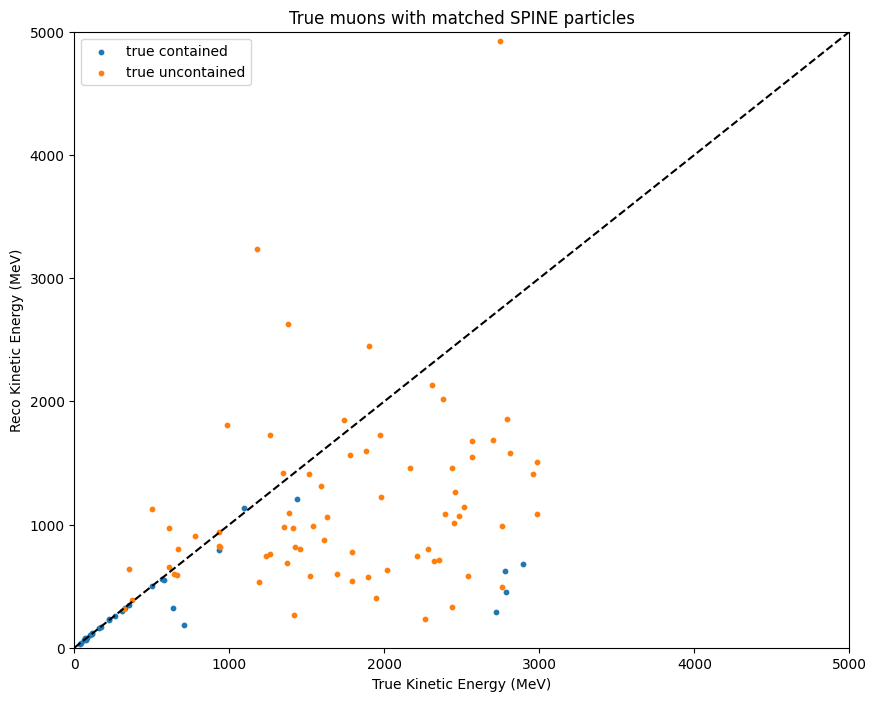

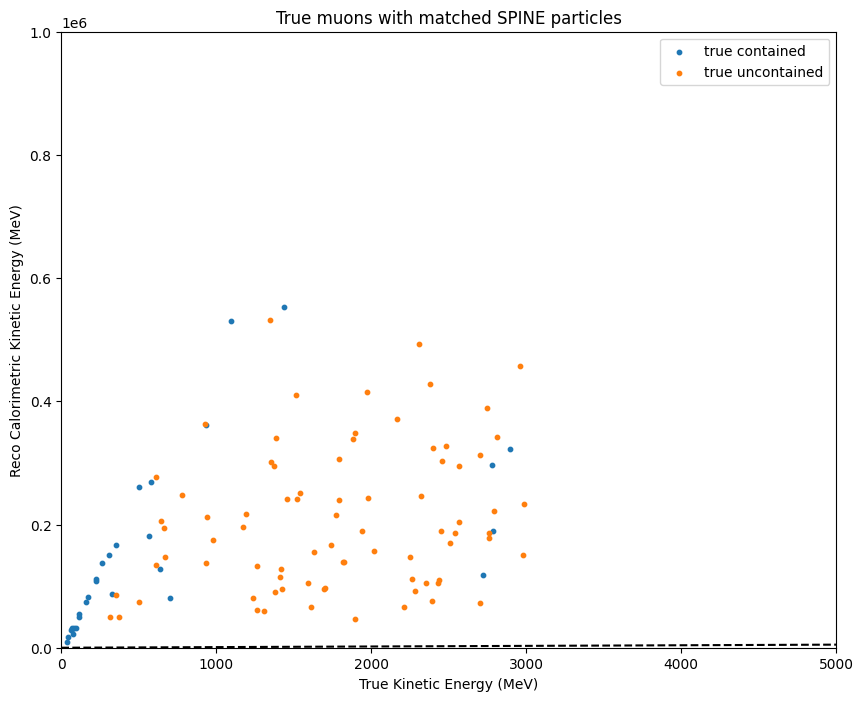

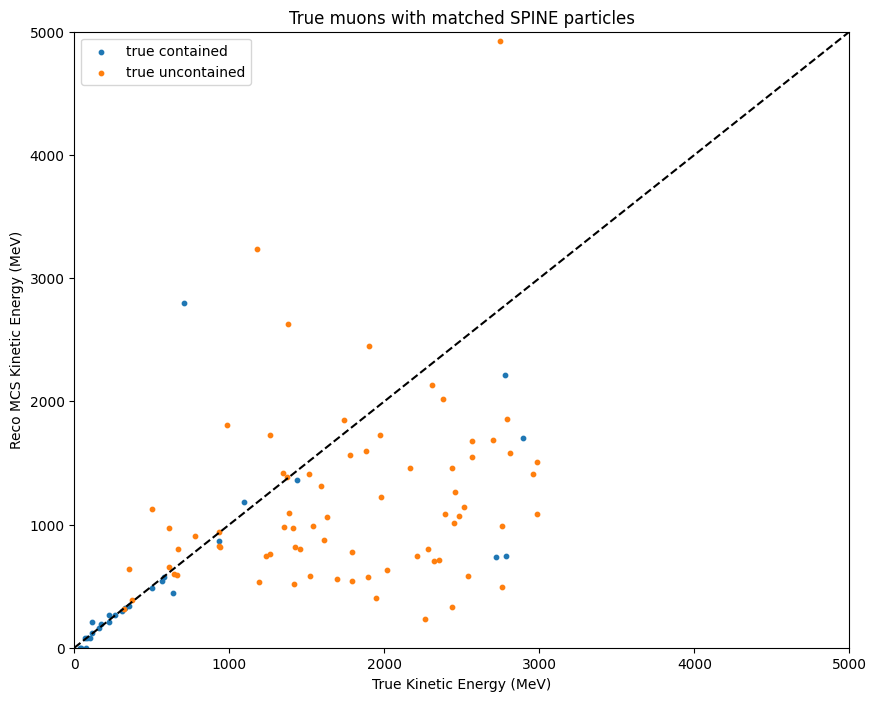

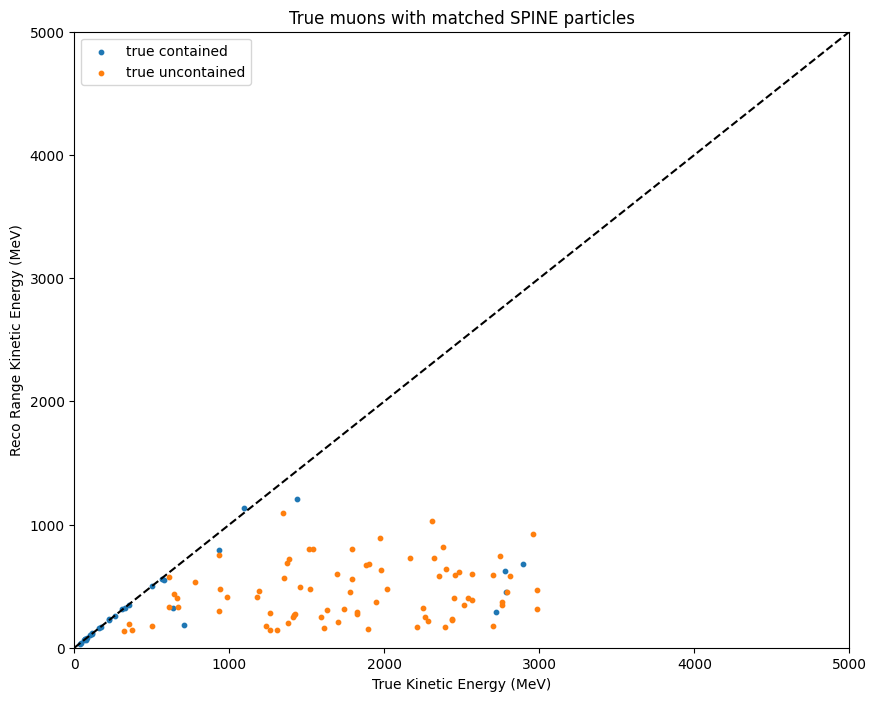

In [13]:
r = (0, 5000)

s = 10

plt.figure(figsize=(10, 8))
plt.scatter(contained_df['truth_ke'], contained_df['reco_ke'], s=s, label='true contained')
plt.scatter(uncontained_df['truth_ke'], uncontained_df['reco_ke'], s=s, label='true uncontained')
plt.plot(r, r, 'k--')
plt.legend()
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco Kinetic Energy (MeV)')
plt.title("True muons with matched SPINE particles")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(contained_df['truth_ke'], contained_df['reco_calo_ke'], s=s, label='true contained')
plt.scatter(uncontained_df['truth_ke'], uncontained_df['reco_calo_ke'], s=s, label='true uncontained')
plt.plot(r, r, 'k--')
plt.legend()
plt.xlim(r)
plt.ylim(0, 1_000_000)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco Calorimetric Kinetic Energy (MeV)')
plt.title("True muons with matched SPINE particles")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(contained_df['truth_ke'], contained_df['reco_mcs_ke'], s=s, label='true contained')
plt.scatter(uncontained_df['truth_ke'], uncontained_df['reco_mcs_ke'], s=s, label='true uncontained')
plt.plot(r, r, 'k--')
plt.legend()
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco MCS Kinetic Energy (MeV)')
plt.title("True muons with matched SPINE particles")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(contained_df['truth_ke'], contained_df['reco_csda_ke'], s=s, label='true contained')
plt.scatter(uncontained_df['truth_ke'], uncontained_df['reco_csda_ke'], s=s, label='true uncontained')
plt.plot(r, r, 'k--')
plt.legend()
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco Range Kinetic Energy (MeV)')
plt.title("True muons with matched SPINE particles")
plt.show()
